In [5]:
import requests
from bs4 import BeautifulSoup
import re
import os

import jieba
import jieba.analyse


#jieba.re_han_default = re.compile("([\u4E00-\u9FD5a-zA-Z0-9+#&\._% ]+)", re.U)
jieba.analyse.set_stop_words('./stop_words.txt')
jieba.load_userdict('./myword.txt')


if os.path.exists('hw1'):
    pass
else:
    os.mkdir('hw1')


useragent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.122 Safari/537.36"
headers={'user-agent' : useragent}

url='https://money.udn.com/rssfeed/news/1001/5588/5599?ch=money'

res=requests.get(url, headers)
res.encoding='utf8'

#text = res.text.replace('<![CDATA[', '').replace(']]>', '')

#print(text)

soup= BeautifulSoup(res.text, 'html.parser')

#print(soup)

titles=soup.select('title')
descriptions=soup.select('description')

text_all=''
tags =[]
for _ in zip(titles, descriptions):
    des=_[1].text.replace('<p>','')
    des=des.replace('</p>','')
    r1=des.rfind('>')
    text_all+=des[r1+1:]
    text_all+=_[0].text
    tags = jieba.analyse.extract_tags(text_all,1000)
    
    tags.extend(tags)

print(tags)

['...', '李登輝', '美國', '經濟', '辭世', '早盤', '疫情', '2019', '冠狀病毒', 'COVID-19', 'GDP', '10', '美股', '武漢肺炎', 'Q2', '英國', '白俄羅斯', '傭兵', '享耆', '98', '數據', 'Uber', '曼德拉', '香港', '彭定康', '莫迪', '疾病', '經濟日報', '新聞', '婦女', '法國', '當局', '紐西蘭菠菜', '曼陀羅花', '歐洲', '收盤', '生產毛額', '萎縮', '憂心', '加劇', '自我隔離期', '29', '33', '俄羅斯', '高檔', '英鎊', '油價', '岸信夫', '參選', '松田康博', '劃時代', '偉大', '臉書', '準備', '摩神廟', '顯示', '辛巴威', '農夫', '35', '補償', '衝擊', '德國', '道瓊', '300', '暫停', '總部', '北歐', '南非', '小池', '今晚', '牛排', '知事', '奠基', '百合', '口罩', '白人', '友好', '美元', '京都', '政治家', '日本', '降幅', '新加坡', '出席', '大跌', '提供', '毒花', '民主', '整成', '北方省', '搞混', '支付', '一客', '最新', '同意', 'https', 'money', 'com', '透過', '專業', '記者', '將即', '熱點', '國際', '證券', '兩岸', '產業', '生技', '理財', '房產', '觀點', '資訊', '當天', '最精闢', '內容', '業界', '必讀', '網站', '務必', '誤以', '喪命', '重創', '季國民', '嚴重', '歐股', '潛在染疫者', '延長', '已經', '大選前', '策畫', '活動展', '調查', '數十', '俄國', '克里姆林宮', '否認', '涉入', '聲譽', '集團', '13', '餐點', '飲業', '試圖', '抗疫', '封鎖', '嘗試', '客群', '倫敦', '僅要', '因為', '1994', '當選', '親自飛', '鬥士', '相知相惜', '沙烏

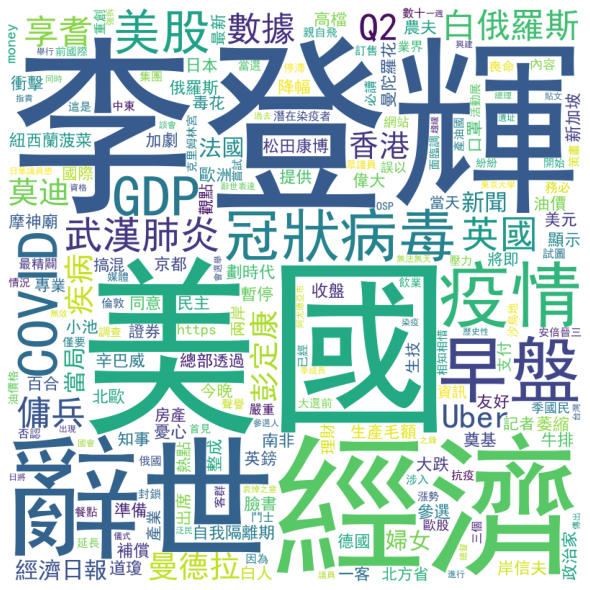

In [4]:
%matplotlib inline
from wordcloud import WordCloud
import matplotlib.pyplot as plt 


text = ''
for i in tags:
    text = text+' '+i

#print(text)

#d={}

#for k,v in word_list:
#    d[k] = int(v)

wordcloud = WordCloud(font_path='simhei.ttf', width = 800, height = 800, 
               background_color ='white', min_font_size = 10).generate(text) 
#wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(text) 
#

# wordcloud = WordCloud(width = 800, height = 800, background_color ='white',
#                       min_font_size = 10).generate_from_frequencies(word_dict) 
 
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()